In [27]:
import scipy.io as sio
import scipy.signal as sig
import pandas as pd

pacientes = [l + str(i).zfill(2) + ".mat" for i in range(1,11) for l in "PS"]
electrodes = [8, 44, 80, 131, 185]
dtfs = []

for paciente in pacientes:
    dtfspatient = None
    test = sio.loadmat(paciente)["data"]
    for electrode in electrodes:
        if (dtfspatient is None):
            dtfspatient = pd.DataFrame(test[:,electrode,:])
        else:
            dtfspatient.add(pd.DataFrame(test[:,electrode,:]))
            
    dtfs.append(dtfspatient / len(electrodes))
          
means = dtfs[0]
for dtf in dtfs[1:]:
    means.add(dtf)
means /= len(pacientes)

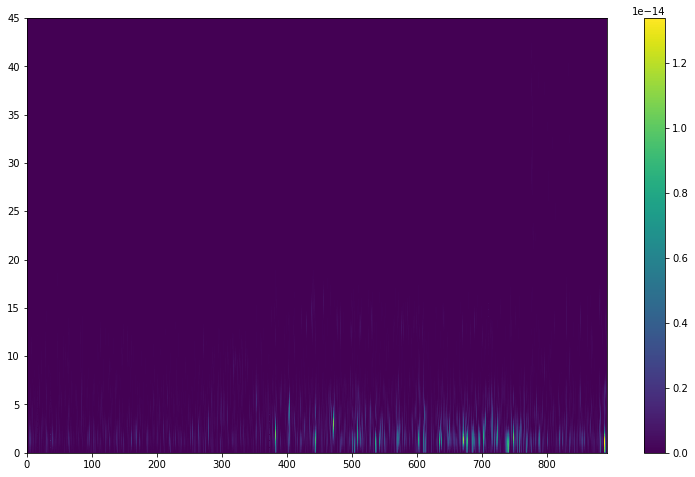

In [28]:
import matplotlib.pyplot as plt

transforms = []
X = []
Y = []
Z = []

i = 0
mx = 0
for epoch in means.iterrows():
    y, z = sig.welch(epoch[1].as_matrix(), fs = 250, nfft = 2048)
    X.append([i]*len(y))
    Y.append(y)
    Z.append(z)
    mx = max(mx,max(z))
    i += 1
    

plt.figure(figsize=(13,8))
plt.pcolor(X, Y, Z)
plt.colorbar()
plt.ylim(0, 45)
plt.show()

### 

In [29]:
import numpy as np

bandas = [0, 4, 8, 13, 30, 45]
bandaspaciente = []

for paciente in pacientes:
    dtfspatient = None
    test = sio.loadmat(paciente)["data"]
    avg1 = np.mean(test, axis = 1)
    avg2 = np.mean(avg1, axis = 0)
    freq, pot = sig.welch(avg2, fs = 250, nfft = 2048)
    bandaspaciente.append([])
    
    for i in range(len(bandas) -1):
        inicio = bandas[i] 
        fin = bandas[i+1]
        valores = [pot[i] for i in range(len(pot)) if freq[i] >= inicio and freq[i] < fin]
        bandaspaciente[-1].append(sum(valores))
        
    print bandaspaciente[-1]
        
        

[5.9713874236482534e-16, 2.4771540936738957e-15, 3.3776436962769349e-16, 1.9445722374455466e-16, 8.5789066120380889e-17]
[5.8025182997784147e-16, 1.2610710556789741e-16, 4.1743094359765801e-17, 1.6193406221316682e-17, 5.2735748485972761e-18]
[1.4611098596929034e-15, 6.6297006444169591e-16, 3.1924793061957635e-17, 7.135958612662498e-17, 3.0139511150693324e-17]
[1.4785953966929379e-16, 8.1528450329900495e-17, 6.1095722175910317e-17, 8.5494295238675402e-17, 8.0096646688171853e-18]
[2.8074862794852147e-15, 2.1966399722264368e-16, 1.6063780988799386e-16, 1.0883116901496347e-16, 3.8146564708180177e-17]
[1.3428106196118793e-16, 3.2669028631171741e-16, 1.3523506207237374e-16, 2.3832618604525945e-17, 2.6141887742811518e-18]
[2.1256034671591625e-16, 1.0017206100839965e-16, 7.8740317351491674e-18, 3.9226681639900791e-18, 7.8901231953063871e-19]
[3.1744339948438646e-15, 3.1489488478451809e-16, 1.4192814600641362e-16, 1.2754658840489862e-16, 5.4384550076507369e-17]
[2.1412883808077956e-15, 1.070967

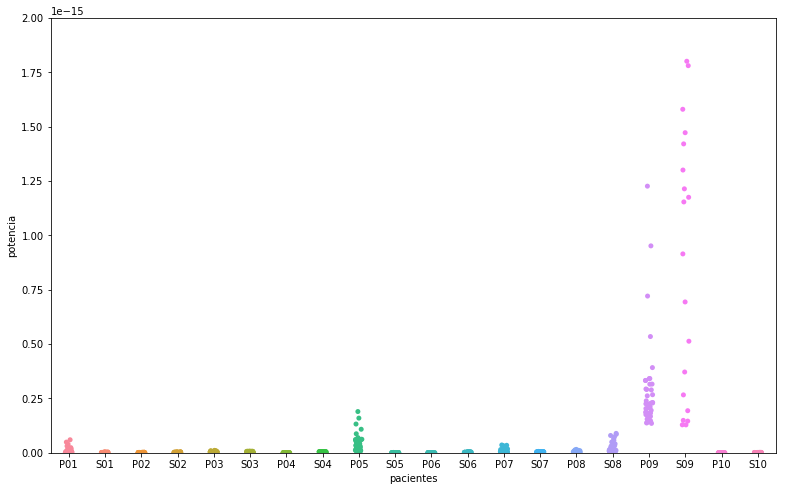

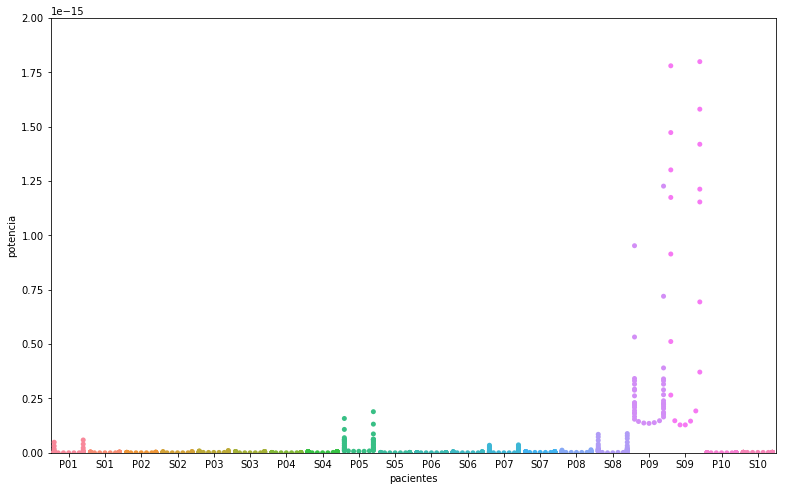

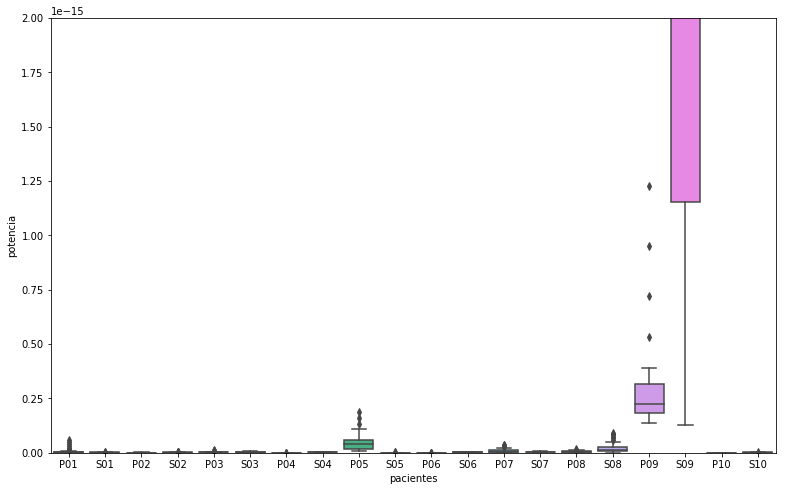

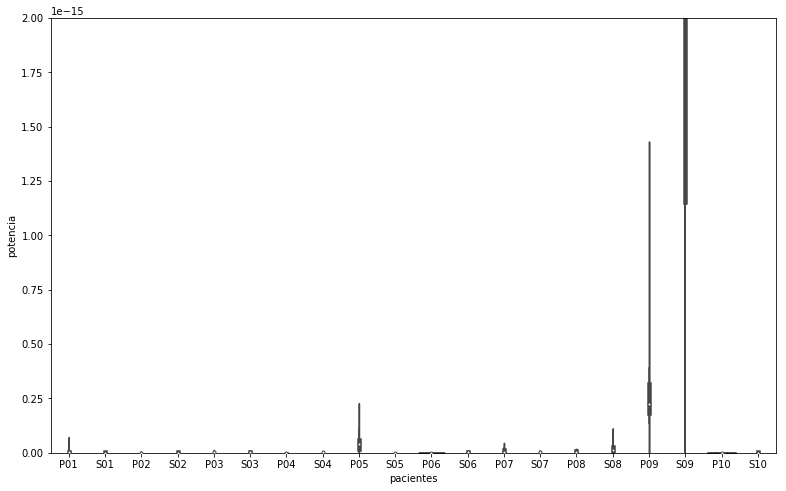

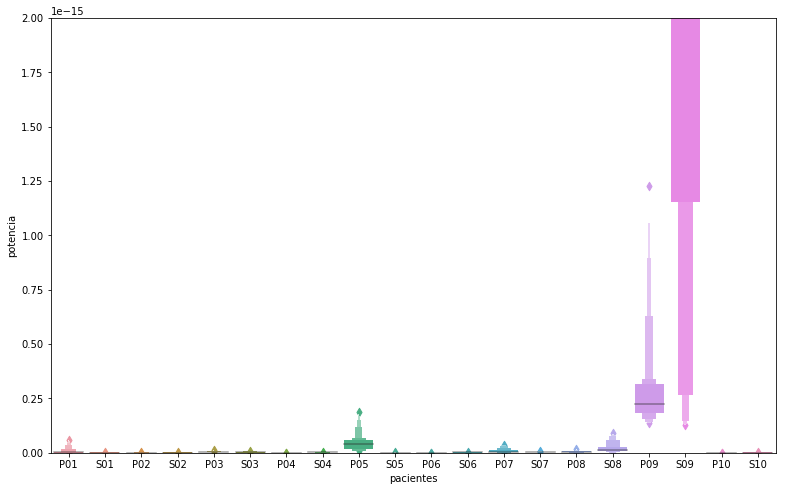

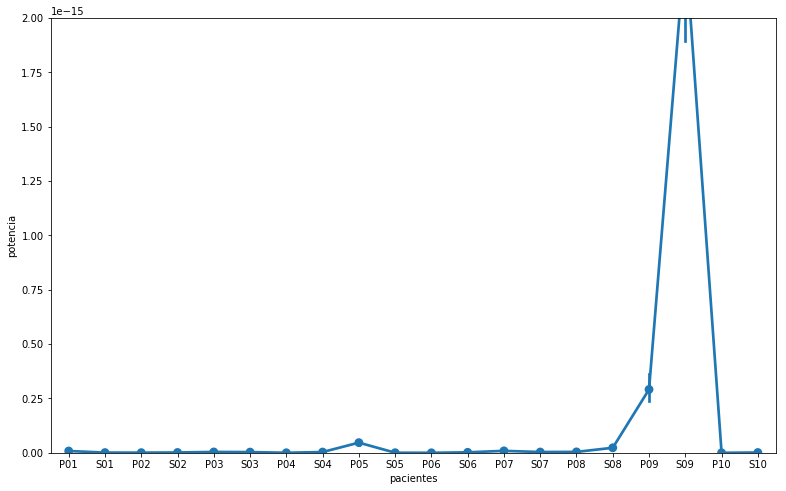

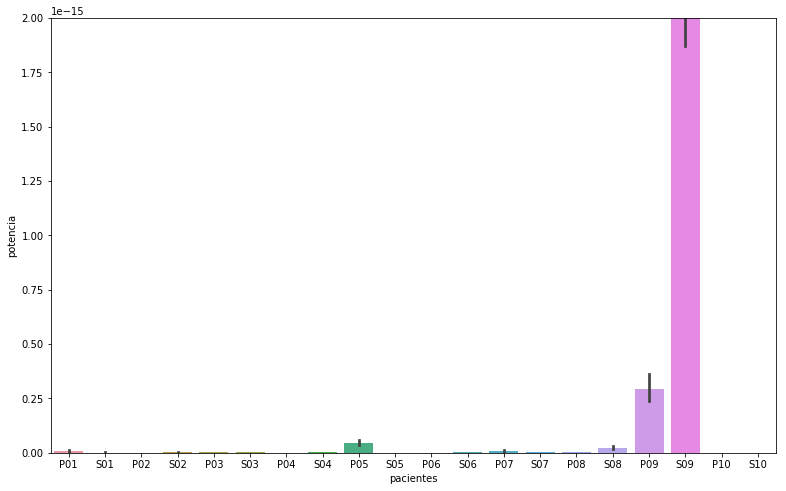

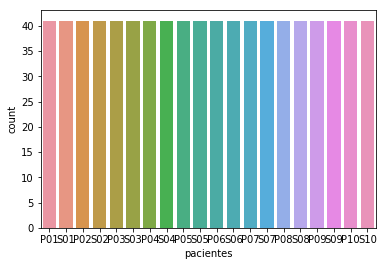

In [40]:
import seaborn as sb
import matplotlib.pyplot as plt
valores = []

for paciente in pacientes:
    test = sio.loadmat(paciente)["data"]
    avg1 = np.mean(test, axis = 1)
    avg2 = np.mean(avg1, axis = 0)
    freq, pot = sig.welch(avg2, fs = 250, nfft = 2048)
    inicio = 8
    fin = 13
    mx = 0
    for j in range(len(pot)):
        if freq[j] >= inicio and freq[j] < fin:
            valores.append((paciente[:3], pot[j]))
            mx = max(mx, pot[j])
            
mx = 2*10**(-15)
    
valoresdf = pd.DataFrame(valores, columns = ["pacientes", "potencia"])

plt.figure(figsize=(13,8))
sb.stripplot(x = "pacientes", y = "potencia", data = valoresdf, jitter = True)
plt.ylim(0, mx)
plt.show()

plt.figure(figsize=(13,8))
sb.swarmplot(x = "pacientes", y = "potencia", data = valoresdf)
plt.ylim(0, mx)
plt.show()

plt.figure(figsize=(13,8))
sb.boxplot(x = "pacientes", y = "potencia", data = valoresdf)
plt.ylim(0, mx)
plt.show()

plt.figure(figsize=(13,8))
sb.violinplot(x = "pacientes", y = "potencia", data = valoresdf)
plt.ylim(0, mx)
plt.show()

plt.figure(figsize=(13,8))
sb.lvplot(x = "pacientes", y = "potencia", data = valoresdf)
plt.ylim(0, mx)
plt.show()

plt.figure(figsize=(13,8))
sb.pointplot(x = "pacientes", y = "potencia", data = valoresdf)
plt.ylim(0, mx)
plt.show()

plt.figure(figsize=(13,8))
sb.barplot(x = "pacientes", y = "potencia", data = valoresdf)
plt.ylim(0, mx)
plt.show()

sb.countplot(x = "pacientes", data = valoresdf)
plt.show()

2.1.c vagina


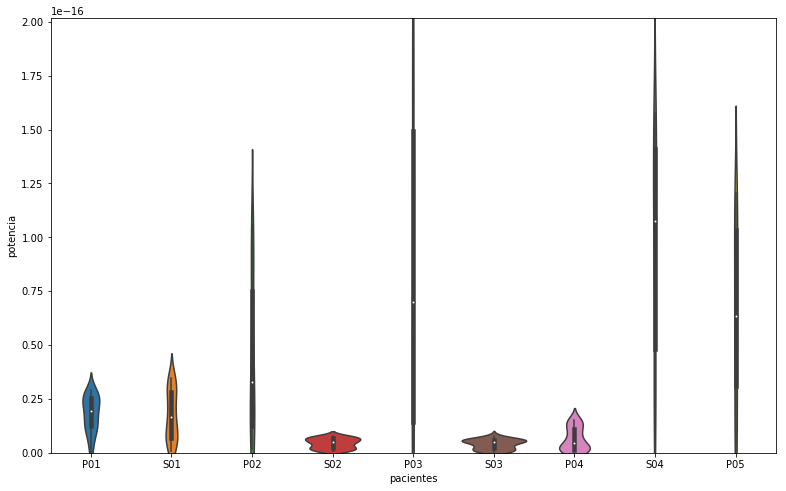

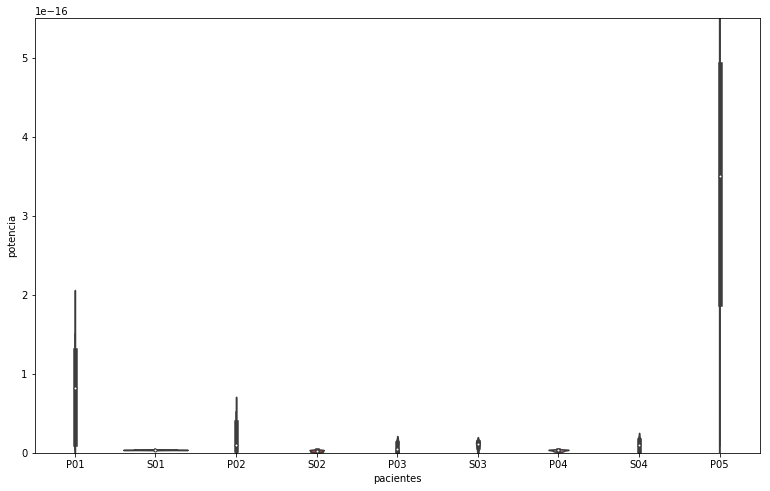

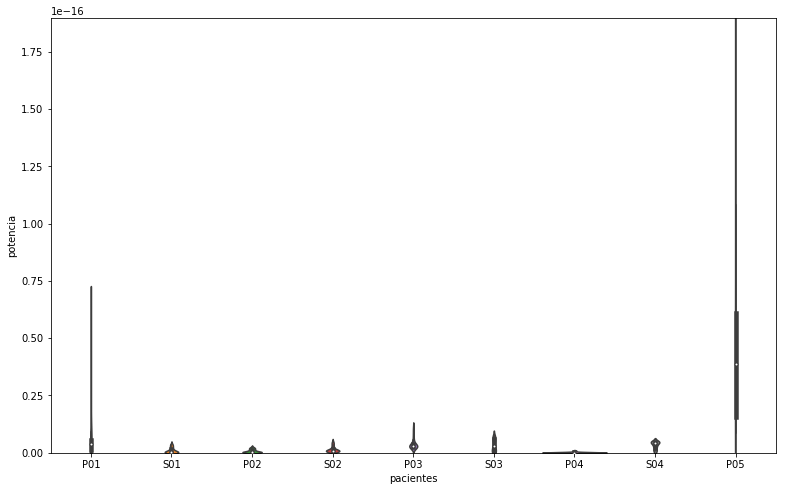

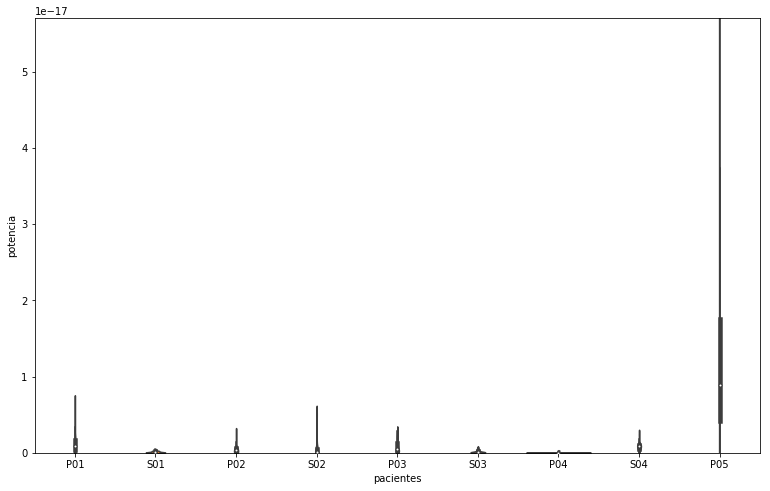

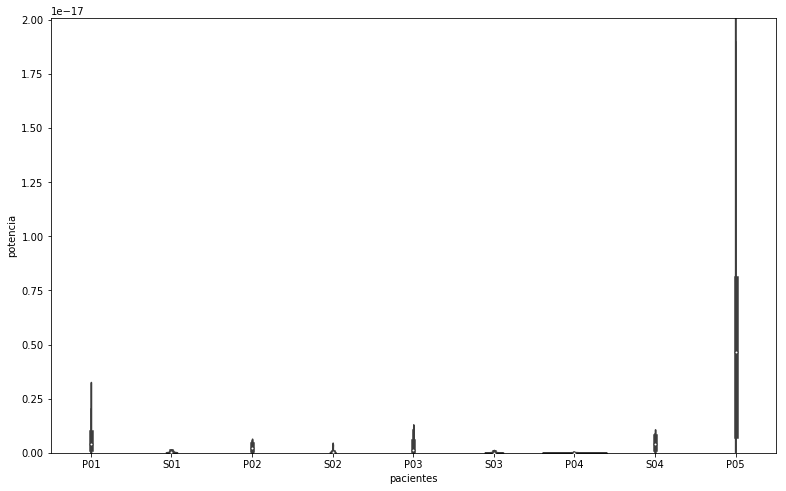

In [75]:
import numpy as np

bandas = [0, 4, 8, 13, 30, 45]
bandaspaciente = []
valores = [[] for i in range(len(bandas))]

for paciente in pacientes[:9]:
    dtfspatient = None
    test = sio.loadmat(paciente)["data"]
    avg1 = np.mean(test, axis = 1)
    avg2 = np.mean(avg1, axis = 0)
    freq, pot = sig.welch(avg2, fs = 250, nfft = 2048)
    bandaspaciente.append([])
    
    for i in range(len(bandas) -1):
        inicio = bandas[i] 
        fin = bandas[i+1]
        for j in range(len(pot)):
            if freq[j] >= inicio and freq[j] < fin:
                valores[i].append((paciente[:3], pot[j]))

for i in range(len(bandas) -1):
    valoresdf = pd.DataFrame(valores[i], columns = ["pacientes", "potencia"])

    plt.figure(figsize=(13,8))
    sb.violinplot(x = "pacientes", y = "potencia", data = valoresdf)
    plt.ylim(0, max([v[1] for v in valores[i]]))
    plt.show()
    

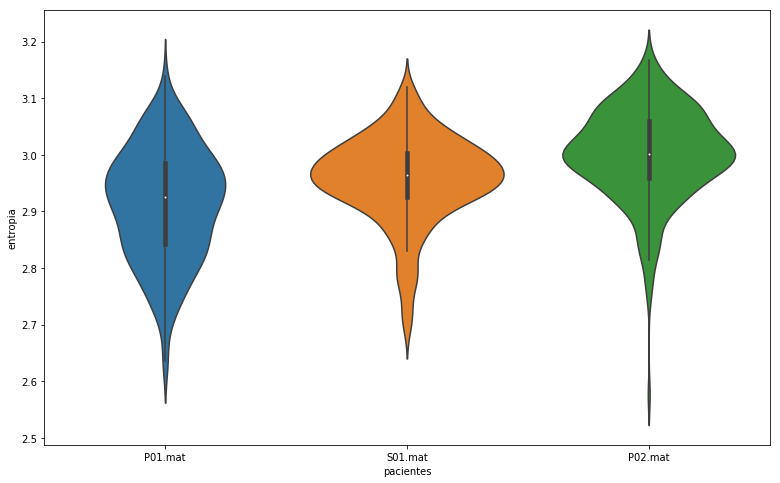

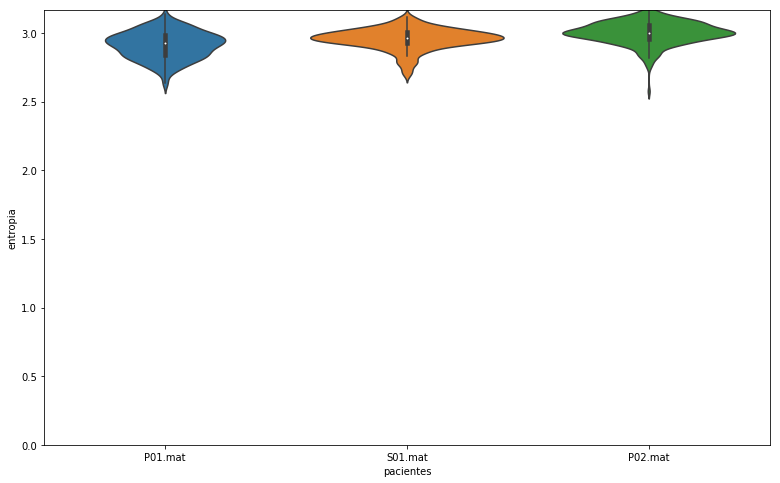

In [71]:
#TODO: setear chamuyo

import numpy as np
import math

bandas = [0, 4, 8, 13, 30, 45]
valores = [[] for i in range(len(bandas))]
entropies = []

for paciente in pacientes[:3]:
    dtfspatient = None
    test = sio.loadmat(paciente)["data"]
    avg2 = np.mean(test, axis = 0)
    for electrode in avg2:
        bins = 25
        hist = np.histogram(electrode, bins)
        suma = float(sum(hist[0]))
        aux = [i/suma * math.log(i/suma) for i in hist[0] if i!=0]
        entropy = -sum(aux)
        entropies.append((paciente, entropy))
        

valoresdf = pd.DataFrame(entropies, columns = ["pacientes", "entropia"])
plt.figure(figsize=(13,8))
sb.violinplot(x = "pacientes", y = "entropia", data = valoresdf)
plt.ylim(0, max([v[1] for v in entropies]))
plt.show()



    
    
